In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import pandas as pd

In [3]:
# where am I? 

import os
print(os.getcwd()) # get current working directory 
# 보통 ipynb 파일과 같은 폴더이다.

C:\Users\ikema\Onedrive\Programing\JupyterlabProjects\Python\Data_science\Example


# import COVID-19 data

In [4]:
df = pd.read_csv(r'data/covid19_tutorial.csv', index_col='date', parse_dates=['date'])

In [5]:
df.tail() # 마지막 n행을 보여준다. 행row / 열column

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-08,2240,3337,10887,2349,3993,17669,2255,14792,14704,7111
2020-04-09,2523,3339,12228,2607,4110,18279,2403,15447,16553,7993
2020-04-10,3019,3340,13215,2767,4232,18849,2520,16081,18595,8974
2020-04-11,3346,3343,13851,2894,4357,19468,2653,16606,20471,9892
2020-04-12,3600,3343,14412,3022,4474,19899,2747,17209,22032,10629


In [6]:
df

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943
2020-04-06,1632,3335,8926,1810,3739,16523,1874,13341,10783,5385
2020-04-07,2035,3335,10343,2016,3872,17127,2108,14045,12798,6171
2020-04-08,2240,3337,10887,2349,3993,17669,2255,14792,14704,7111
2020-04-09,2523,3339,12228,2607,4110,18279,2403,15447,16553,7993
2020-04-10,3019,3340,13215,2767,4232,18849,2520,16081,18595,8974
2020-04-11,3346,3343,13851,2894,4357,19468,2653,16606,20471,9892


## individual bar chart for specific dates 

특정 날짜의 각각의 bar들을 고른다 </br>
이게 핵심인데? x축 y축을 골라놔야 할 꺼 아냐?

In [7]:
s = df.loc['2020-04-03']

In [8]:
s

Belgium            1143
China              3326
France             6520
Germany            1275
Iran               3294
Italy             14681
Netherlands        1490
Spain             11198
USA                7418
United Kingdom     3611
Name: 2020-04-03 00:00:00, dtype: int64

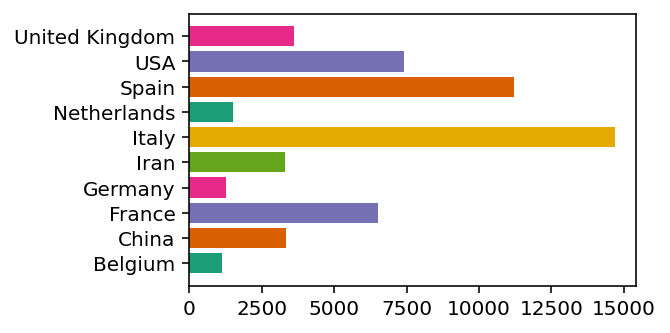

In [9]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values

ax.barh(y=y, width=width, color=colors)
plt.show()


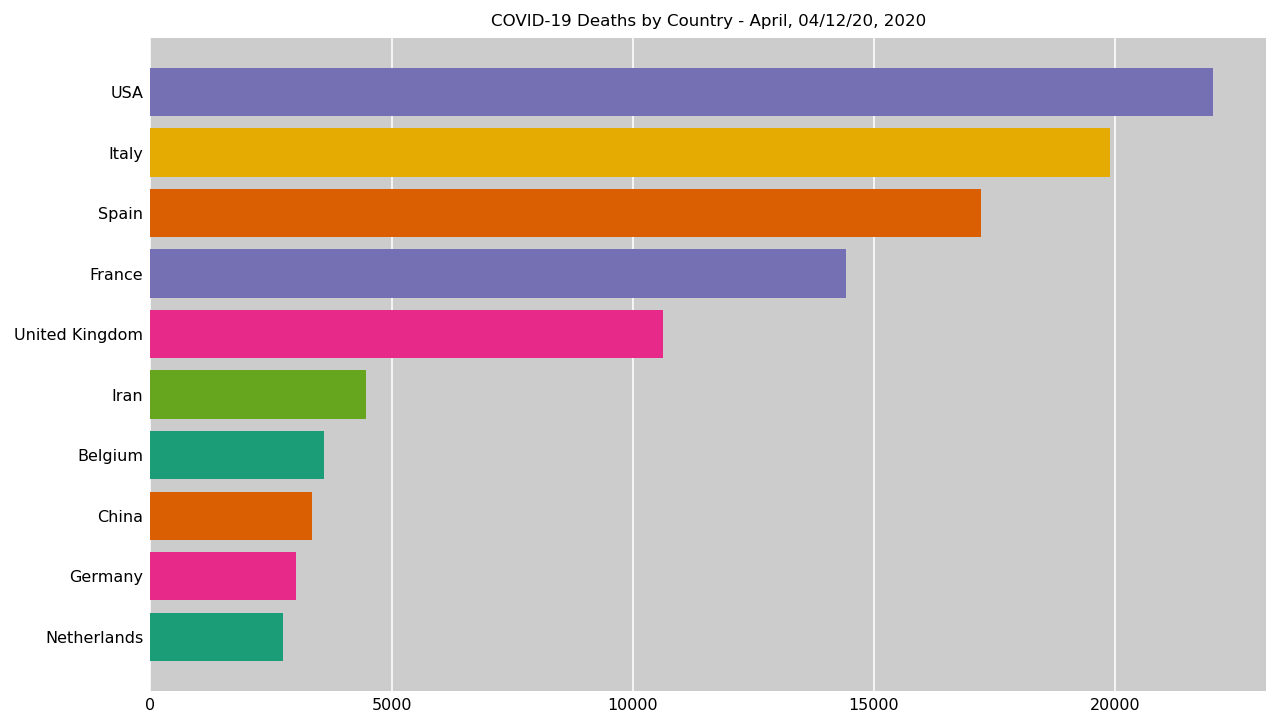

In [82]:
def nice_axes(ax) :
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    
    [spine.set_visible(False) for spine in ax.spines.values()]
    
    
nice_axes(ax)
fig

## Plot three consecutive days ordering the bars

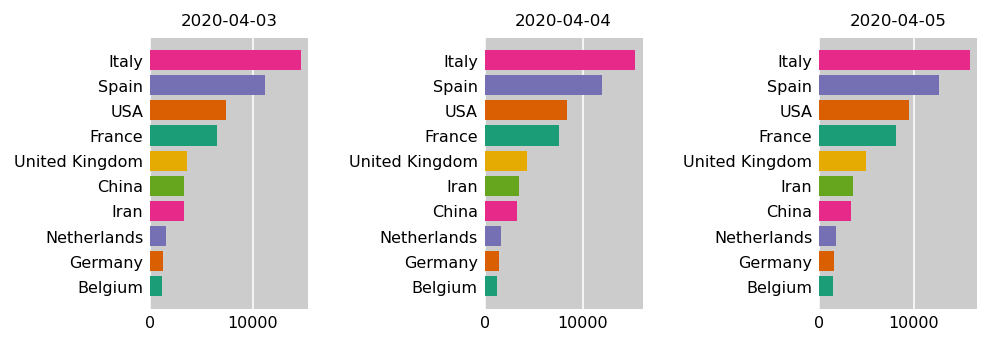

In [11]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)

dates = ['2020-04-03', '2020-04-04', '2020-04-05']
for ax, date in zip(ax_array, dates) :
    s = df.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

plt.show()

# Countries change color

# Don't sort - rank instead

In [12]:
df.loc['2020-04-03'].rank(method='first')

Belgium            1.0
China              5.0
France             7.0
Germany            2.0
Iran               4.0
Italy             10.0
Netherlands        3.0
Spain              9.0
USA                8.0
United Kingdom     6.0
Name: 2020-04-03 00:00:00, dtype: float64

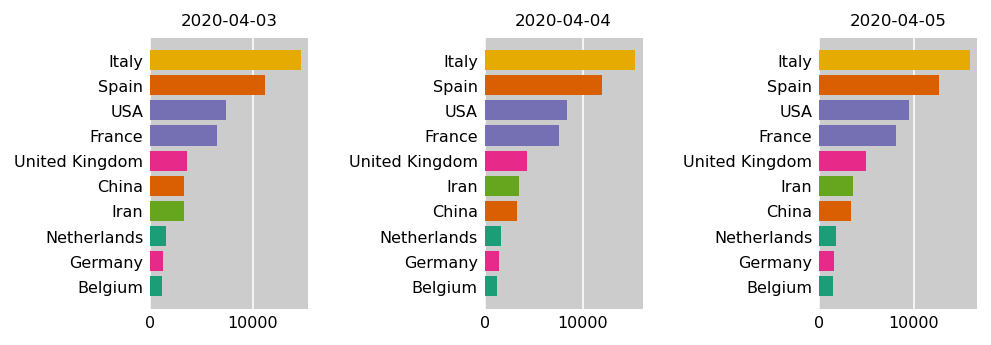

In [13]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2020-04-03', '2020-04-04', '2020-04-05']
for ax, date in zip(ax_array, dates) :
    s = df.loc[date]
    y = df.loc[date].rank(method='first')
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

plt.show()

## How to smoothly transition

In [14]:
# 2020-04-03에서 05일까지의 일부 표를 꺼내준다.
df2 = df.loc['2020-04-03':'2020-04-05']
df2

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943


In [15]:
# 앞에 인덱스를 달기 위해 인덱스를 다시 꺼내준다. reset으로
df2 = df2.reset_index()
df2

,date,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
0,2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
1,2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2,2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943


# Choose number of steps between each date

In [16]:
# 인덱스 사이를 벌려주기위해 인덱스를 곱해준다.
df2.index = df2.index * 5
df2

,date,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
0,2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
5,2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
10,2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943


## Expand DataFrame with reindex

transition의 부드러움을 위해서 여기를 건드려주면 된다

In [17]:
last_idx = df2.index[-1] + 1 # 11
df_expanded = df2.reindex(range(last_idx)) # 11번째까지 expand하기 (reindex로 가능하네)
df_expanded

# transition의 부드러움을 위해서 나중에 여길 건드려 주면 될거야

,date,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
0,2020-04-03,1143.0,3326.0,6520.0,1275.0,3294.0,14681.0,1490.0,11198.0,7418.0,3611.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-04-04,1283.0,3330.0,7574.0,1444.0,3452.0,15362.0,1656.0,11947.0,8387.0,4320.0
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_expanded['date'] = df_expanded['date'].fillna(method='ffill') # value가 있는곳까지 NaN 대신에 propagation 해준다. date가 바뀐걸 잘봐
df_expanded = df_expanded.set_index('date')
df_expanded

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143.0,3326.0,6520.0,1275.0,3294.0,14681.0,1490.0,11198.0,7418.0,3611.0
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,1283.0,3330.0,7574.0,1444.0,3452.0,15362.0,1656.0,11947.0,8387.0,4320.0
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rank each row

In [19]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1.0,5.0,7.0,2.0,4.0,10.0,3.0,9.0,8.0,6.0
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Linear interpolate missing values

In [20]:
df_expanded = df_expanded.interpolate()
# 빈 영역을 자동으로 연속적으로 채워준다.

In [21]:
df_expanded

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143.0,3326.0,6520.0,1275.0,3294.0,14681.0,1490.0,11198.0,7418.0,3611.0
2020-04-03,1171.0,3326.8,6730.8,1308.8,3325.6,14817.2,1523.2,11347.8,7611.8,3752.8
2020-04-03,1199.0,3327.6,6941.6,1342.6,3357.2,14953.4,1556.4,11497.6,7805.6,3894.6
2020-04-03,1227.0,3328.4,7152.4,1376.4,3388.8,15089.6,1589.6,11647.4,7999.4,4036.4
2020-04-03,1255.0,3329.2,7363.2,1410.2,3420.4,15225.8,1622.8,11797.2,8193.2,4178.2
2020-04-04,1283.0,3330.0,7574.0,1444.0,3452.0,15362.0,1656.0,11947.0,8387.0,4320.0
2020-04-04,1315.8,3330.6,7677.8,1472.0,3482.2,15467.0,1679.0,12085.8,8607.4,4444.6
2020-04-04,1348.6,3331.2,7781.6,1500.0,3512.4,15572.0,1702.0,12224.6,8827.8,4569.2
2020-04-04,1381.4,3331.8,7885.4,1528.0,3542.6,15677.0,1725.0,12363.4,9048.2,4693.8


In [22]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1.0,5.0,7.0,2.0,4.0,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.8,7.0,2.0,4.2,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.6,7.0,2.0,4.4,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.4,7.0,2.0,4.6,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.2,7.0,2.0,4.8,10.0,3.0,9.0,8.0,6.0
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0


## Plot each step of the transition

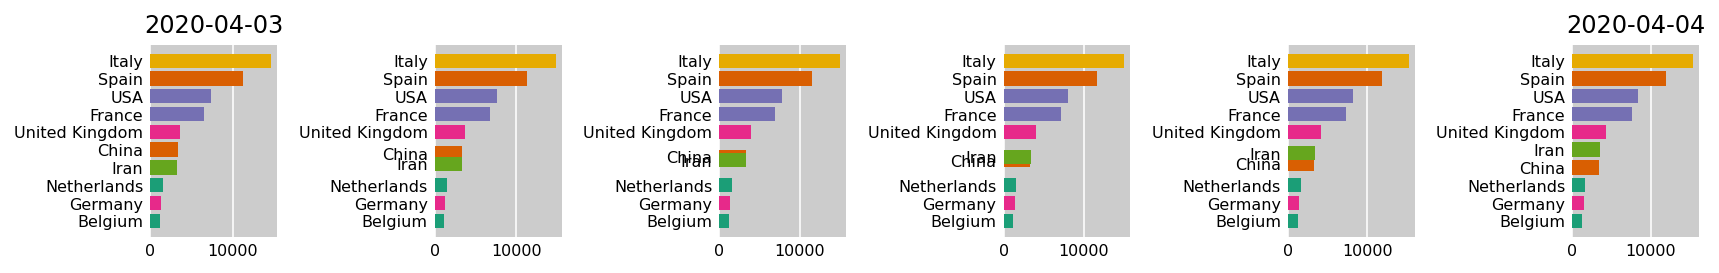

In [23]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12,2), dpi=144, tight_layout=True)
labels = df_expanded.columns # 각 column의 이름을 label 리스트로
 
for i, ax in enumerate(ax_array.flatten()) : # 순서를 인덱스와 함께 반환하고 싶을때
    y = df_rank_expanded.iloc[i] # integer로 찾는 dataframe에서의 location
    width = df_expanded.iloc[i] 
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)

ax_array[0].set_title('2020-04-03') #첫번째 껄 4월 3일로
ax_array[-1].set_title('2020-04-04') # 마지막 껄 4월 4일로
plt.show()

[<BarContainer object of 10 artists>]

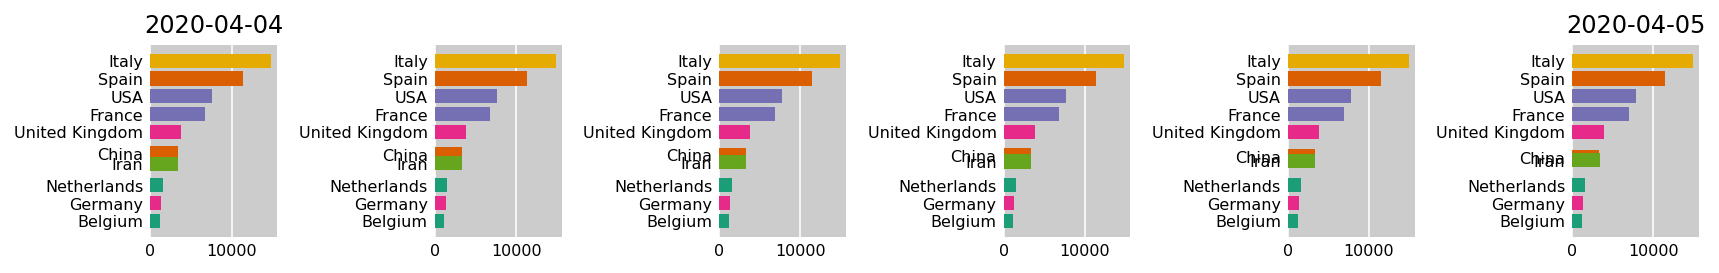

In [53]:
# next days

fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12,2), dpi=144, tight_layout=True)
labels = df_expanded.columns

for i, ax in enumerate(ax_array.flatten(), start=5) :
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
    
ax_array[0].set_title('2020-04-04')
ax_array[-1].set_title('2020-04-05')



AttributeError: 'AxesSubplot' object has no attribute 'show'

# Write a function to prepare all of the data

모든 값을 위한 데이터를 준비하자

In [25]:
def prepare_data(df, steps=24) :
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()
    

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143.000000,3326.000000,6520.000000,1275.000000,3294.000000,14681.000,1490.000000,11198.000000,7418.000,3611.000000
2020-04-03,1148.833333,3326.166667,6563.916667,1282.041667,3300.583333,14709.375,1496.916667,11229.208333,7458.375,3640.541667
2020-04-03,1154.666667,3326.333333,6607.833333,1289.083333,3307.166667,14737.750,1503.833333,11260.416667,7498.750,3670.083333
2020-04-03,1160.500000,3326.500000,6651.750000,1296.125000,3313.750000,14766.125,1510.750000,11291.625000,7539.125,3699.625000
2020-04-03,1166.333333,3326.666667,6695.666667,1303.166667,3320.333333,14794.500,1517.666667,11322.833333,7579.500,3729.166667


In [26]:
df_rank_expanded.head()

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1.0,5.000000,7.0,2.0,4.000000,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.958333,7.0,2.0,4.041667,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.916667,7.0,2.0,4.083333,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.875000,7.0,2.0,4.125000,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.833333,7.0,2.0,4.166667,10.0,3.0,9.0,8.0,6.0


## Animation

블릿으로 해보자..

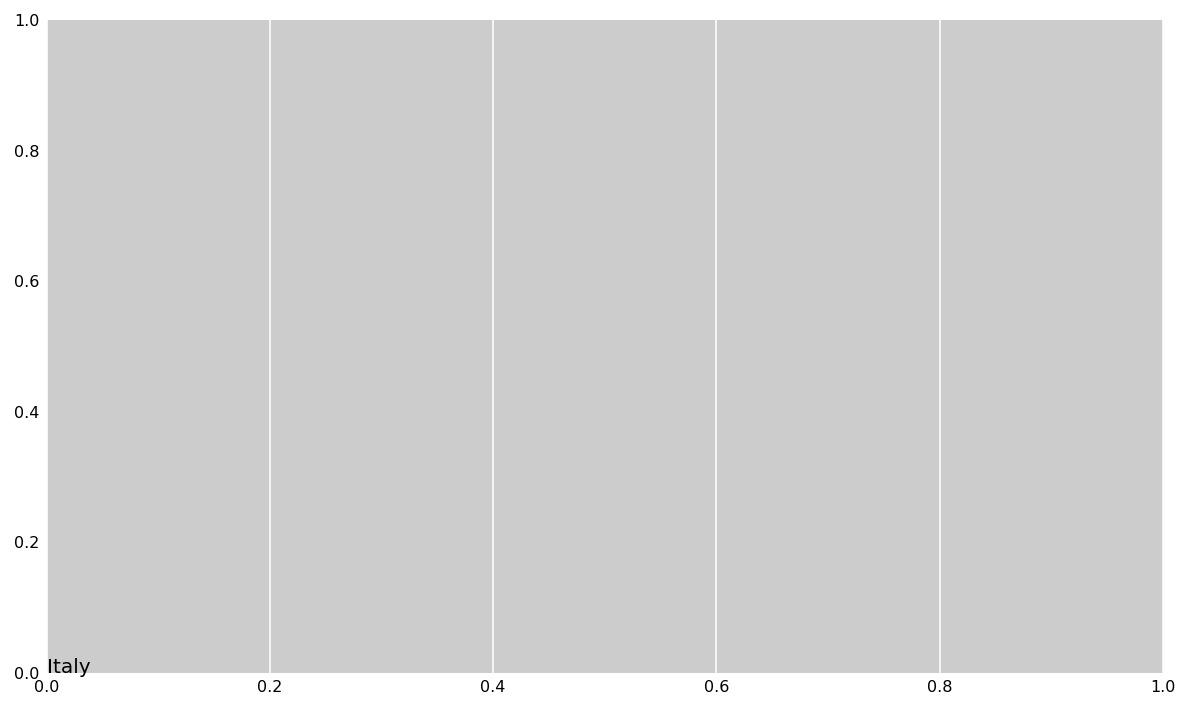

In [87]:
fig = plt.figure(figsize=(10,6), dpi=144)
ax = fig.add_subplot()

def init() :
    ax.clear()
    nice_axes(ax)

    
def update(i) :
    for bar in ax.containers: # bar를 계속 업데이트 하면서 삭제하기
        bar.remove()
    y = df_rank_expanded.iloc[i] # y값 위치 잡아주기
    width = df_expanded.iloc[i] # 넓이 만들기
    ax.barh(y=y, width=width, color=colors, tick_label=labels) # bar 차트 만들기
    date_str = df_expanded.index[i].strftime('%B, %D, %Y') # 문자열 날짜 만들어주기
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller') # 문자열 날짜를 이용해서 title 만들기

anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), interval=100, repeat=False)

In [89]:
anim.save('movie/covid19.mp4')